# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset, No-show appointments, seeks to explain why patients recieve doctor's appointment and fail to turn up. The dataset records whether or not a patient turned up for the appointment and relates the outcome to a number of characteristics that could explain why the patient turned up or not. There are a number of columns in the dataset which include:
PatientId- This is the unique patient's identification.

AppointmentID- This is the appointment number specific to the patient.

Gender-This tells the gender of the patient.

ScheduledDay- This shows the day in which the patient set up the appointment with the doctor.

AppointmentDay-This tells when and what time the appoitment is scheduled.

Age- This shows the age of the patient.

Neighbourhood-It shows the location of the hospital.

Scholarship-This indicates whther or not the patient is enrolled for the Brazilian scholarship.

Hipertension-This indicates whether or not the patient has hypertension.

Diabetes-This indicates whether or not the patient has diabetes.

Alcoholism- This shows whether or not the patient takes alcohol.

Handcap-This indicates whether or not the patient is handcapped.

SMS_received-This indicates whther or not the patient received an SMS for the appointment.

No-show-This indicates whether or not the patient showed up for the appointment.


### Questions for Analysis
1. Does the age of the patient determine whether the patient will show up for the doctor's appointment?
2. Does the presence of a scholarship make the patient show up for the doctor's appointment?
3. Does the gender of the patient influence the decision to show up or not for the doctor's appointment?


In [1]:
#Importing the packages that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
!pip install --upgrade pandas==[version]

  Could not find a version that satisfies the requirement pandas==[version] (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5)
No matching distribution found for pandas==[version]


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [4]:
#We first load our data and print out the first few lines.
df=pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#We check for the number of samples
len(df.axes[0])

110527

__There are 110527 samples.__

In [6]:
#We then check for the number of columns
len(df.axes[1])

14

__There are 14 columns in the dataset.__

In [7]:
#Inspecting the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The variables of interest in the project which are __No-show, Age, Scholarship and SMS received__ are _string, integer, integer and integer_ respectively. 
The schedule day and appointment days are however strings. We may need to change that or drop the columns. In our case, we shall not use the two variables for analysis, and so, we shall be dropping them in a few.

In [8]:
#We now check whether there are any missing or null in the dataset.
df.isnull().sum().any()

False

There are __no__ missing values in the dataset!

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
#Next, we check for duplicate rows
df.duplicated().sum()

0

__We have NO duplicate rows in our dataset!__

In [11]:
#We check for number of non-null unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning

_The ScheduleDay and AppointmentDay columns are strings, yet they represent dates and time in which the patient is scheduled and appointment date for the doctor's appointment respectively. They ought to be in date formart and thus need cleaning. We however shall not use this columns for our analysis, and so we drop the two columns in the cell below._

In [12]:
#In cleaning the data, we first drop the two columns
df.drop(['ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*The No show column is indicated with a hyphen, it is good programming practice to use underscore instead of a hyphen, so that it may not limit in any operations thereafter. We now wish to rename the No-show column to read No_show, having an underscore other than a hyphen.*

In [13]:
#We then need to rename the last column and confirm the changes
df=df.rename(columns={'No-show':'No_show'})
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does the age of the patient determine whether the patient will show up for the doctor's appointment?)

Text(0,0.5,'Frequency')

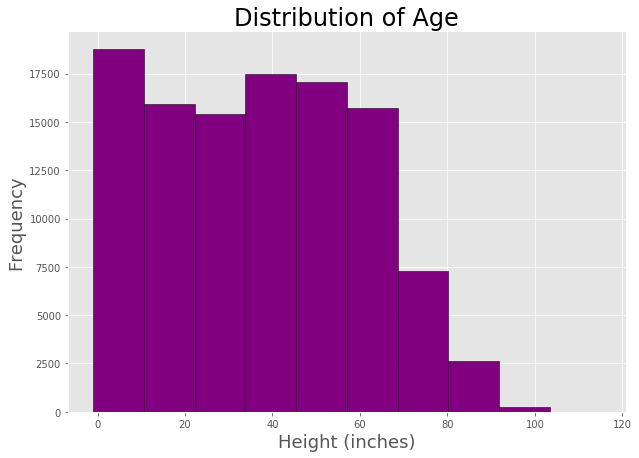

In [14]:
# histogram of the Age to help us understand more about the age
df.Age.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Age', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)


___The plot depicts that age is skewed to the right.___

In [15]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'M'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female
statistics_female = df[df['Gender'] == 'F'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,PatientId_male,AppointmentID_male,Age_male,Scholarship_male,Hipertension_male,Diabetes_male,Alcoholism_male,Handcap_male,SMS_received_male,PatientId_female,AppointmentID_female,Age_female,Scholarship_female,Hipertension_female,Diabetes_female,Alcoholism_female,Handcap_female,SMS_received_female
count,3.868700e+04,3.868700e+04,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,7.184000e+04,7.184000e+04,71840.000000,71840.000000,71840.000000,71840.000000,71840.000000,71840.000000,71840.000000
mean,1.502496e+14,5.677102e+06,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571,1.460136e+14,5.674337e+06,38.893987,0.123232,0.213516,0.078035,0.017024,0.019543,0.336888
std,2.581770e+14,6.990406e+04,24.435221,0.221836,0.373010,0.238244,0.228448,0.180917,0.454492,2.549561e+14,7.201597e+04,22.155235,0.328706,0.409792,0.268228,0.129361,0.150009,0.472649
min,4.374176e+04,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.346759e+12,5.642308e+06,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.974486e+12,5.639222e+06,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.336718e+13,5.681916e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.987250e+13,5.679852e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.488922e+13,5.726456e+06,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.395978e+13,5.724905e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999465e+14,5.790466e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


_Above, we can compare the descriptive statistics, comparing the genders, male and feamle_

In [16]:
Showed_up=df.No_show=='Yes'
Not_showed_up=df.No_show=='No'

In [17]:
bin_edges=[-1,18,37,55,115]
bin_names=['Min age','Mid-min age','Mid age','Mid max age']
df['age_brackets']=pd.cut(df['Age'],bin_edges,labels=bin_names)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_brackets
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Mid max age
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Mid max age
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Mid max age
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Min age
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Mid max age


In [18]:
df['age_brackets'].value_counts()

Min age        28866
Mid max age    27504
Mid-min age    27250
Mid age        26906
Name: age_brackets, dtype: int64

Text(0.5,0,'Age bracket')

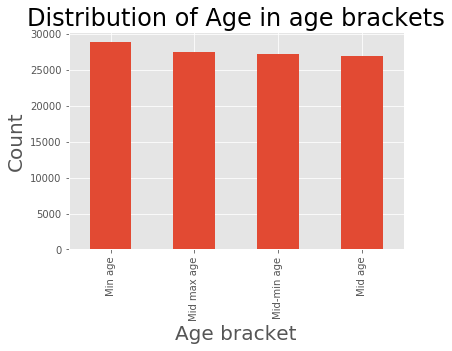

In [19]:
df['age_brackets'].value_counts().plot(kind='bar')
plt.title('Distribution of Age in age brackets', size=24)
plt.ylabel('Count',size=20)
plt.xlabel('Age bracket',size=20)

__From the data output and graph above, the age distributions are almost equal and ranges between 26906 and 28866__

In [20]:
df['age_brackets'][Showed_up].value_counts()

Mid-min age    6414
Min age        6347
Mid age        5255
Mid max age    4303
Name: age_brackets, dtype: int64

Text(0.5,0,'Age bracket')

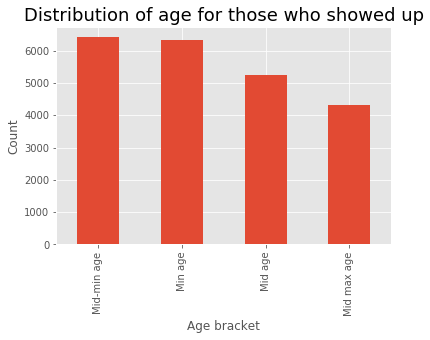

In [21]:
df['age_brackets'][Showed_up].value_counts().plot(kind='bar')
plt.title('Distribution of age for those who showed up', size=18)
plt.ylabel('Count')
plt.xlabel('Age bracket')

In [22]:
df['age_brackets'][Not_showed_up].value_counts()

Mid max age    23201
Min age        22519
Mid age        21651
Mid-min age    20836
Name: age_brackets, dtype: int64

Text(0,0.5,'Count')

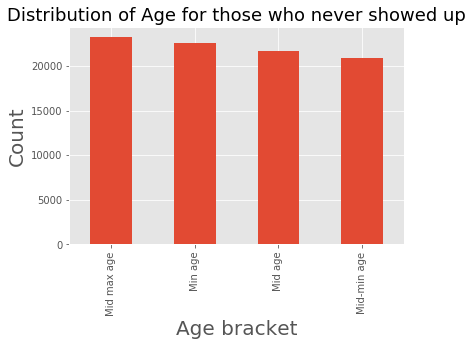

In [25]:
df['age_brackets'][Not_showed_up].value_counts().plot(kind='bar')
plt.title('Distribution of Age for those who never showed up', size=18)
plt.xlabel('Age bracket',size=20)
plt.ylabel('Count',size=20)

From the output above, most of the people who showed up are in the age of around 18years, while most of whom who never showed up for the appointment are over 55 years old.

### Research Question 2  (Does the presence of a scholarship make the patient show up for the doctor's appointment?)

In [26]:
df.Scholarship.unique()

array([0, 1])

__Scholarship column has two unique values, 0,1 which represents no scholarship and with scholarship respectively.__

Text(0.5,0,'Status')

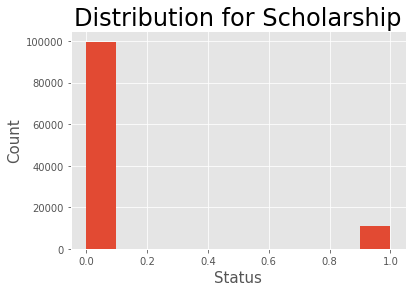

In [27]:
df['Scholarship'].hist()
plt.title('Distribution for Scholarship', size=24)
plt.ylabel('Count',size=15)
plt.xlabel('Status',size=15)

__Most of the patients have no scholarship and more details can be seen below using the value counts__

In [28]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

Text(0,0.5,'Count')

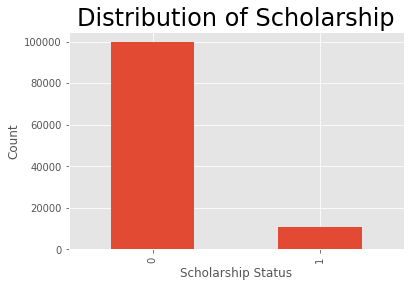

In [29]:
df['Scholarship'].value_counts().plot(kind='bar')
plt.title('Distribution of Scholarship', size=24)
plt.xlabel('Scholarship Status')
plt.ylabel('Count')

We now look at the No show column

In [30]:
df.No_show.unique()

array(['No', 'Yes'], dtype=object)

__The No_show column has two values, No and Yes, and of string data type.__

Text(0,0.5,'Count')

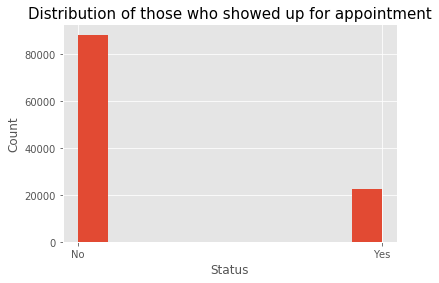

In [31]:
df['No_show'].hist()
plt.title('Distribution of those who showed up for appointment', size=15)
plt.xlabel('Status')
plt.ylabel('Count')

In [32]:
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

In the same way, most of the patients did not show up for the doctor's appointment. We now check for the relation between the two.

In [33]:
from scipy.stats import ttest_ind
group1 = df[df['No_show']=='No']
group2 = df[df['No_show']=='Yes']

#perform independent two sample t-test
ttest_ind(group1['Scholarship'], group2['Scholarship'])

Ttest_indResult(statistic=-9.690142299793202, pvalue=3.388940331734045e-22)

__From the output, we can see that;__

__The T test statistic= -9.69(2dp)__

__pvalue= 3.39(2dp)__

__Since the p-value is more than .05, we fail to reject the null hypothesis of the t-test and conclude that there is no sufficient evidence to say that the scholarship options lead to different outcomes of the patient showing up or not.__

__We may now wish to have a plot of the scholarship and outcome(showup) to see if we could get more inference.__

In [34]:
scholarship=df.Scholarship==1
no_scholarship=df.Scholarship==0

In [35]:
df.No_show[scholarship].value_counts()

No     8283
Yes    2578
Name: No_show, dtype: int64

Text(0,0.5,'Count')

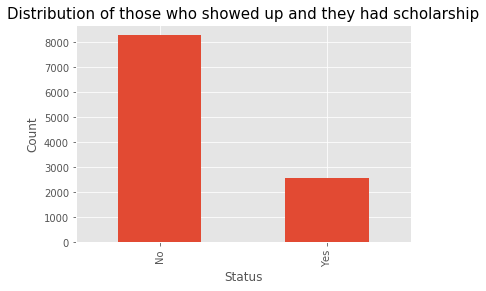

In [36]:
df.No_show[scholarship].value_counts().plot(kind='bar')
plt.title('Distribution of those who showed up and they had scholarship', size=15)
plt.xlabel('Status')
plt.ylabel('Count')

In [37]:
df.No_show[no_scholarship].value_counts()

No     79925
Yes    19741
Name: No_show, dtype: int64

Text(0,0.5,'Count')

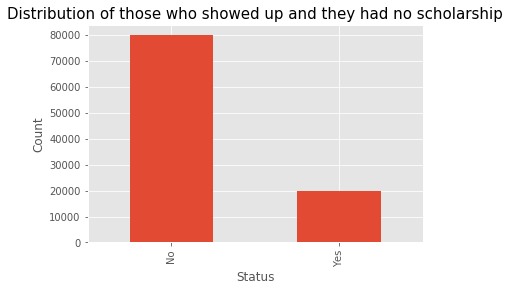

In [38]:
df.No_show[no_scholarship].value_counts().plot(kind='bar')
plt.title('Distribution of those who showed up and they had no scholarship', size=15)
plt.xlabel('Status')
plt.ylabel('Count')

__Even though more people failed to turn up for the appointment, there are more of them who turned up and had a scholarship than those who turned up and they did not have the scholarship__



__Research Question 3:Does the gender of the patient influence the decision to show up or not for the doctor's appointment?__

In [39]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

The gender of the patient are female and male

Text(0,0.5,'Count')

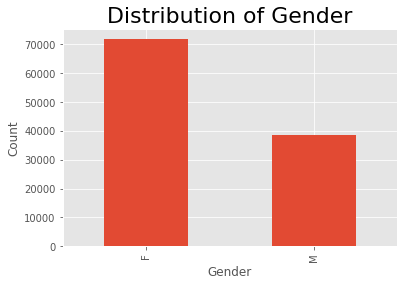

In [40]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender', size=22)
plt.xlabel('Gender')
plt.ylabel('Count')

In [41]:
df.Gender[Showed_up].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

_More females showed up for the appointment than males_

Text(0.5,0,'Gender')

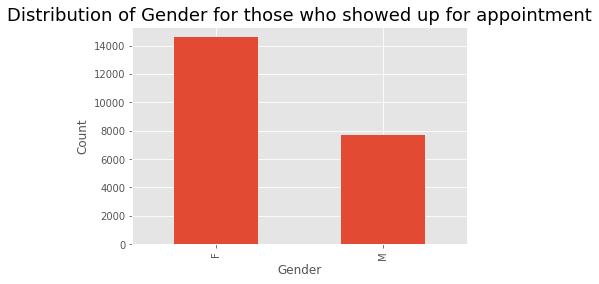

In [42]:
df.Gender[Showed_up].value_counts().plot(kind='bar')
plt.title('Distribution of Gender for those who showed up for appointment',size=18)
plt.ylabel('Count')
plt.xlabel('Gender')

In [43]:
df.Gender[Not_showed_up].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

Text(0.5,0,'Gender')

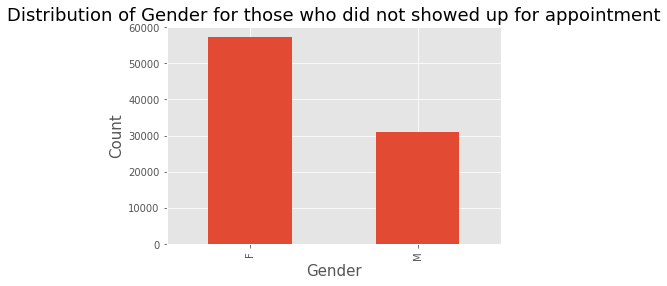

In [44]:
df.Gender[Not_showed_up].value_counts().plot(kind='bar')
plt.title('Distribution of Gender for those who did not showed up for appointment',size=18)
plt.ylabel('Count',size=15)
plt.xlabel('Gender',size=15)

Again, more females never showed up for the doctor's appointment.

In the data, we have less male than female. Among the male, most of them did not show up for the doctor's appointment. 

<a id='conclusions'></a>
## Conclusions

1. Generally, we have similar percentage of males and females who did not show up for the doctor's appointment. This shows that gender may not be a factor that may determine whether or not a patient shows up for the doctor's appointment. We may further need to investigate more variables.

2. Among the people who showed up for the doctor's appointment, most of them had scholarships. Even though there were some who turned up and did not have a scholarship, they were fewer than those who showed up and had a scholarship.

3. From the data, age seemed to be an important factor as the younger ages of 18 and below showed up for the doctor's appointment, while those of older ages, 55 and above, barely showed up for the appointment.

Limitations
1. There is a very big gap between those who showed up for the doctor's appointment and those who did not. This may limit significant change or difference in comparing between certain variables. A smaller sample, which is not biased could be better.

## Submitting your Project 



In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0